# 3 Levels for Exploring Data 

* Level 0 : Getting Started
* Level 1 : Univariate Analysis
* Level 2 : Bi-Variate Analysis
* Lever 3 : Multivariate Analysis and asking questions from the data

## Level 0 Tasks (Getting Started) 

1.Visually inspect the first few and last few rows of the data \
2.Check the shape of the data frame \
3.Check the count of null values in each column \
4.Inspect all the column names and cross check with the data dictionary \
5.Check the information of the data frame using the info() function 

# Importing the necessary libraries 

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
# Checking the library versions 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.2.4
Seaborn version:  0.11.1
Matplotlib version:  3.3.4


In [3]:
# Ensure that the data file is in the current working directory as that of the Jupyter notebook

df = pd.read_csv("data.csv") # read_csv: inbuilt function of pandas to read files 

# Level 0 analysis (Getting Started)

# Reading the top 5 rows 

In [121]:
df.head() # head prints the top 5 rows 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


# Reading the bottom 5 rows

df.tail() # tail returns the bottom 5 rows

#  Number of rows and columns 

In [122]:
print(df.shape) #returns a tuple with the details number of rows and columns 

(10127, 19)


# Display the names of all the columns

In [123]:
print(df.columns) # returns array of columns in dataset 

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')


# Displaying the dataset information

In [124]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

# Checking if there are null values in any columns

In [125]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

LEVEL 1 Analysis 
-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types

### These are the kinds of analysis that can be performed on categorical data
1. Check if the variable is Nominal or Ordinal.
2. Check how many categories are present.
3. Check the Mode.
4. Check for Missing values.
5. Think about how the missing values could be treated?
6. What kind of graph/chart can be plotted using this data?

Note: We are analyzing only one column at a time (Univariate Analysis)

# Separating Categorical and Numerical Variables

In [4]:
# Separating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Dependent_count           Credit_Limit
Education_Level           Total_Revolving_Bal
Marital_Status            Avg_Open_To_Buy
Income_Category           Total_Trans_Amt
Card_Category             Total_Trans_Ct
Months_on_book            Avg_Utilization_Ratio
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

### User defined functions for level 1 analysis of categorical columns
This function will check for the following: \
Unique values \
Mode \
Sum of all the null values \
Total count of missing values 

In [5]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

# 1. Analysis of Attrition Flag: If the account is closed (Attired Customer) else (Existing Customer) 
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [6]:
info_of_cat("Attrition_Flag")

Unique values in Attrition_Flag are: ['Existing Customer' 'Attrited Customer']
Mode of Attrition_Flag is Existing Customer
Number of missing values in Attrition_Flag is 0


###### Attrition Flag is a nominal datatype.

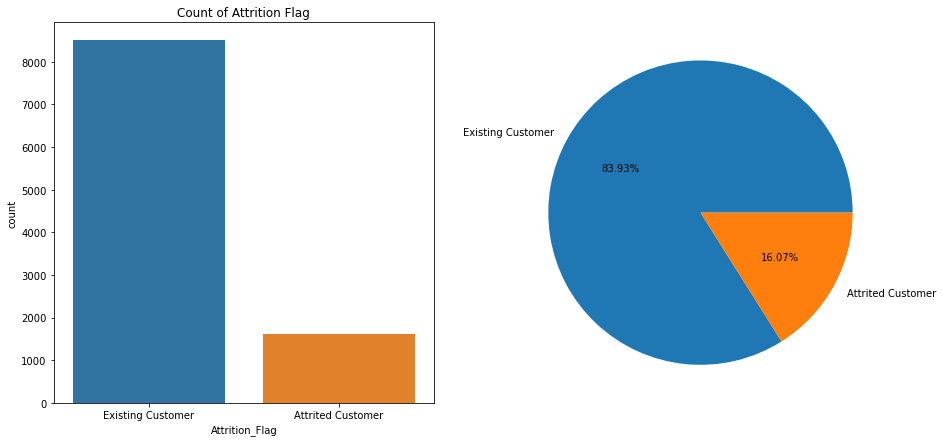

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition Flag")                  # Set the title of the graph
percentage = df["Attrition_Flag"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Attrition_Flag"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Attrition_Flag"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## Interpretation: Dataset indicates that 16% of the customers left the bank while 84% of the customers are still with it.

# 2. Analysis of  Gender column: Gender of a person (Male or Female)
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [8]:
info_of_cat("Gender")

Unique values in Gender are: ['M' 'F' nan]
Mode of Gender is F
Number of missing values in Gender is 93

There are null values in the Gender column


###### Gender is a nominal datatype (Categorical).

##    Way to fill: Mode of the Gender Column

Note: Mode is not a perfect way to way to fill the missing value in this case. One might need to handle such a situation with caution. This is for demonstration purposes only. 

In [9]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace = True)

F


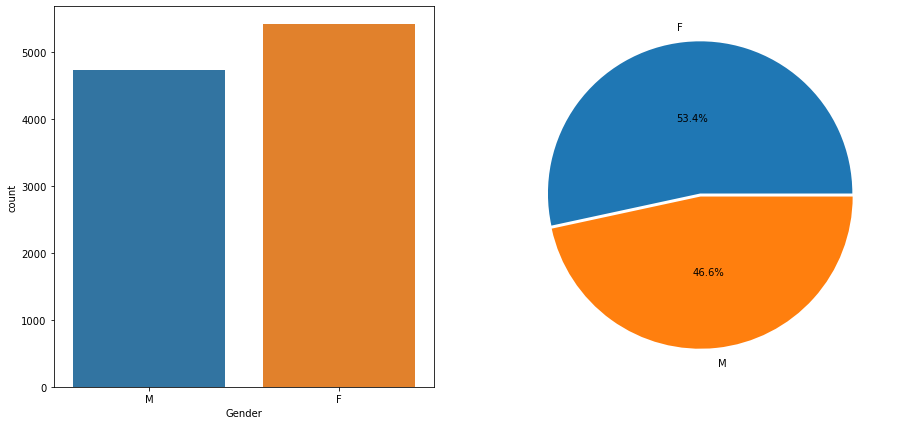

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["Gender"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()


## Interpretation: Females customers are more in number, contributing to 53%.

# 3. Analysis of  Dependent Count: Number of dependents on each customer 
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [11]:
info_of_cat("Dependent_count") # check for the unique values in the feature

Unique values in Dependent_count are: [  3   5   4   2   0   1   9  29 103  22  25  78  90  35  60  42 119 104
  88  48  34 143 100  59 130  95   7  82  69  92 110  17  10  27  19 109
 142 116 113 125  80  63  24  97 102  52  87  11 117  13  67  89  61  72
 120  76]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


###### Dependent_count is a ordinal datatype  (Categorical) as it is having hierarchy in it.

## Interpretation: Some people have many dependents on them. This could be a result of human error in data.

Note: This might not always be the correct approach unless verified by a domain expert! 

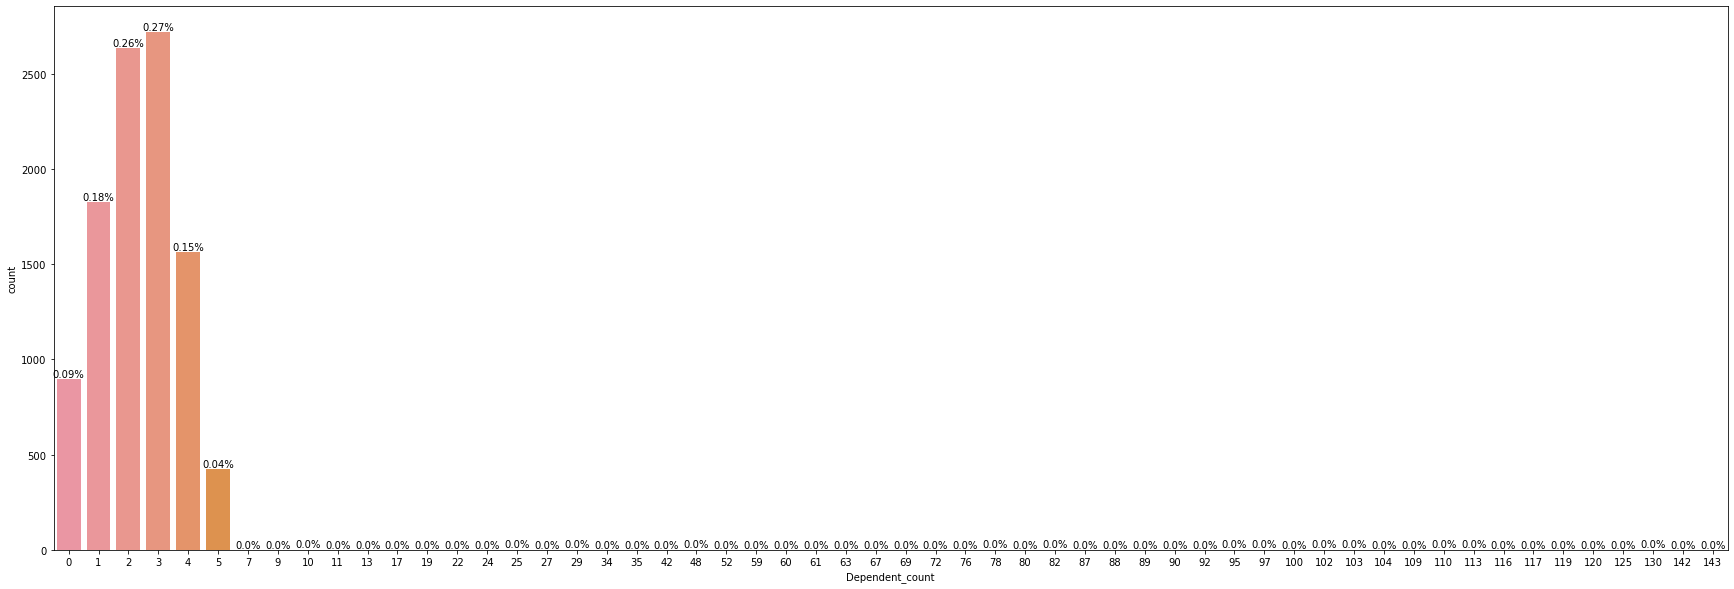

In [12]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)                                                               # annotate: used to annotate over objects, here objects are the bars
plt.show()


## Interpretation: Very few people have dependents higher than 5. However, there are some cases where the dependent count is greater than 100, which is abnormal. Hence, data clearing might be  required. 

# Outliers Analysis and Treatment:
The customers who have a dependent count greater than 5 are replaced with the mean of the population.

In [14]:
# Making changes in data
mean = int(df.Dependent_count.mean())
# accessing the data higher than 6
x = df[df["Dependent_count"] > 5].index
for index in x:
    df.loc[index, "Dependent_count"] = mean

In [15]:
info_of_cat("Dependent_count")

Unique values in Dependent_count are: [3 5 4 2 0 1]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


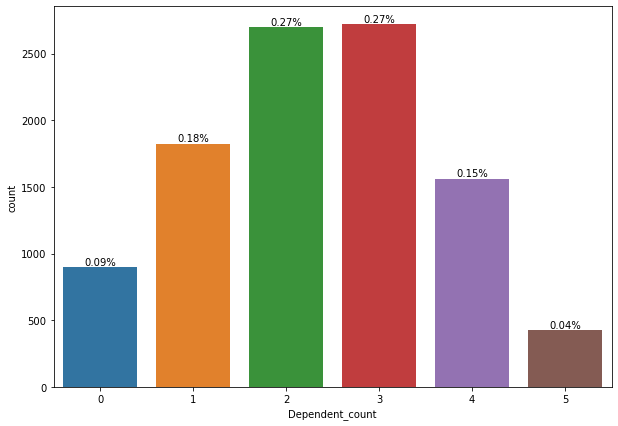

In [16]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## Interpretation: Card holders usually have 2 to 3 dependents on them which adds up to 53% of the total population.

# 4. Analysis of  Education Level: Education level of a card holder 
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [17]:
info_of_cat( "Education_Level")

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


###### Education_Level is an ordinal data type (Categorical) as it is having hierarchy in it.

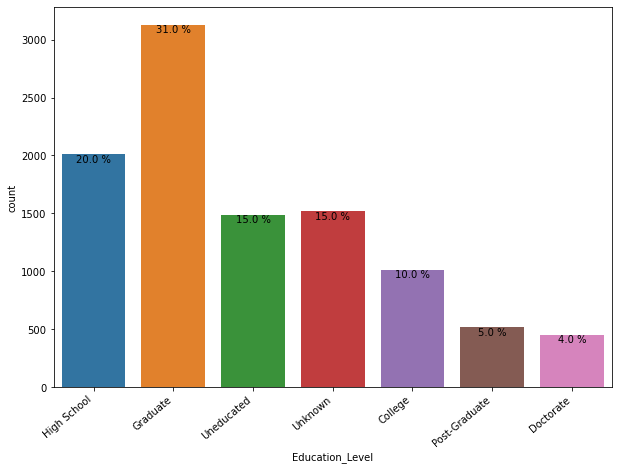

In [18]:
# Plot the graph-
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Education_Level"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") # set_xticklabels is used to set the labels of the x axis
                                                                       # ax.get_xtickslabels() returns all the labels that we need to print
                                                                       # rotation: rotate the xlabels at angle provided, and
                                                                       # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right
count = len(df["Education_Level"])                                     # counting the number of rows in whole dataset
for bar in ax.patches:                                                 # ax.patches returns the rectange object from matplotlib 
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           # first it calculate the bar heightand then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectangle bar.
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          # va: Vertical axis: -> top means percentage would bneath the bar head
                                                                        # annotate: used to annotate over objects. here objects are the bars 
plt.show()


## Interpretation: Most people are graduated or have completed high school, which adds up to 51% of the total population.

# 5. Analysis of  Marital Status: Marital status of a card holder
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [19]:
info_of_cat("Marital_Status")

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


###### Marital_Status is a nominal datatype (Categorical).

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64


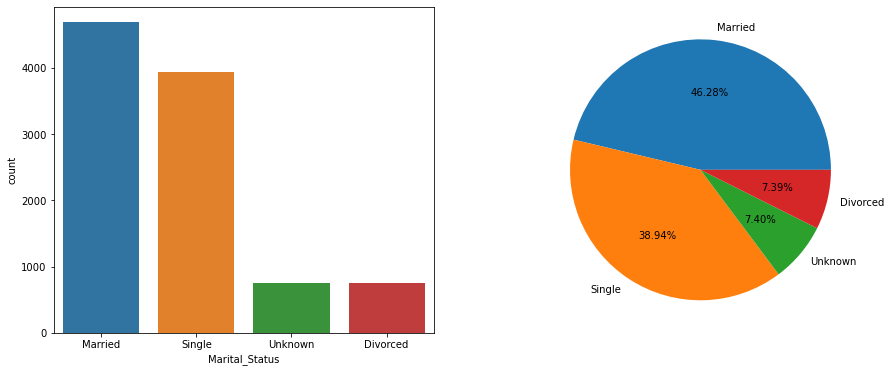

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (df["Marital_Status"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)
sns.countplot(x = df["Marital_Status"], ax = ax[0])
labels = list(df["Marital_Status"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()

## Interpretation:  46% of the people are Married and 39% are Single. 

# 6. Analysis of  Income Category: Income categories of card holders

LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [21]:
info_of_cat( "Income_Category")

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


###### Income_Category is a ordinal datatype (Categorical) as it is having hierarchy in it.

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64


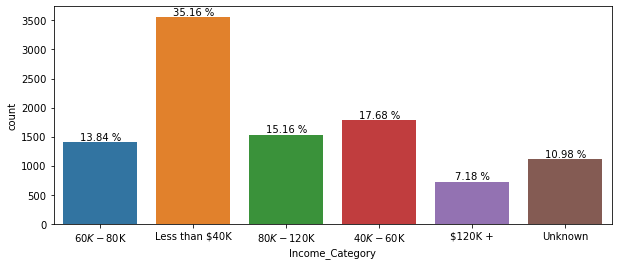

In [22]:
print((df["Income_Category"].value_counts()/len(df))*100)               #First calculated the number of income category via value counts inbuilt function and then 
                                                                            #calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x = df[ 'Income_Category'], ax = ax)
for bar in ax.patches:                                                  # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  # first it calculate the bar height and then dividing by the number of rows in data and 
                                                                            #multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       # annotate: used to annotate over objects. here objects are the bars.
plt.show()

## Interpretation: Majority of the population is earning less than $40k.

# 7. Analysis of  Card Category: Type of card
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 


In [23]:
info_of_cat("Card_Category")

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132

There are null values in the Card_Category column


###### Card_Category is a nominal datatype (Categorical).

##    Missing value treatment:  Mode of the card type

Note: Mode is not a perfect way to way to fill the missing value in this case. One might need to handle such a situation with caution by consulting the domain expert. This is for demonstration purposes only. 

In [24]:
card_mode = df.Card_Category.mode()[0]
print(card_mode)
df["Card_Category"].fillna(card_mode, inplace = True)

Blue


Blue        9447
Silver       544
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


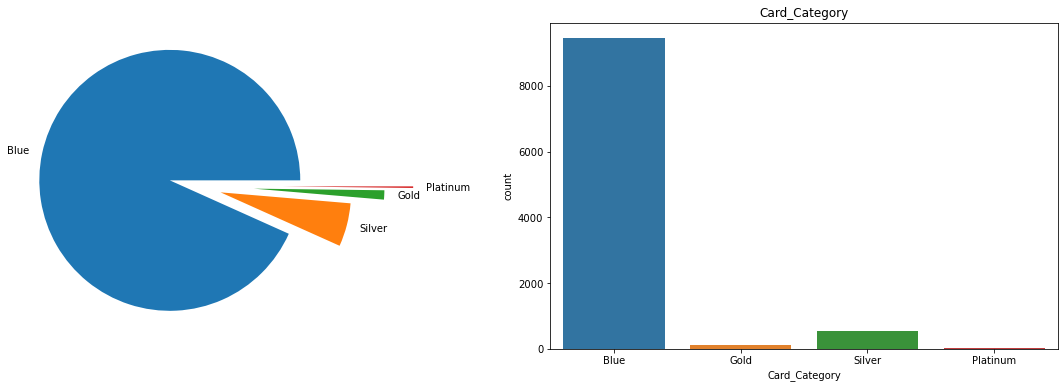

In [25]:
data = df["Card_Category"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45, 0.67], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Card_Category"], ax = ax[1])                                                                                               
plt.title("Card_Category")                                                  # title is used to prints the title on the image. 
plt.show()

## Interpretation: Majority of the population is using the Blue card followed by Silver. The Platinum card is sold the least. 

# 8. User defined function which returns percentage using bar graphs

In [26]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    plt.show()

# 9. Analysis of Total Relationship Count: Years of relationship with the bank
LEVEL 1 Analysis of categorical data : ordinal data  (Univariate Analysis)

In [27]:
info_of_cat("Total_Relationship_Count")

Unique values in Total_Relationship_Count are: [5 6 4 3 2 1]
Mode of Total_Relationship_Count is 3
Number of missing values in Total_Relationship_Count is 0


###### Total_Relationship_Count is a ordinal datatype (Categorical) as it is having hierarchy in it.

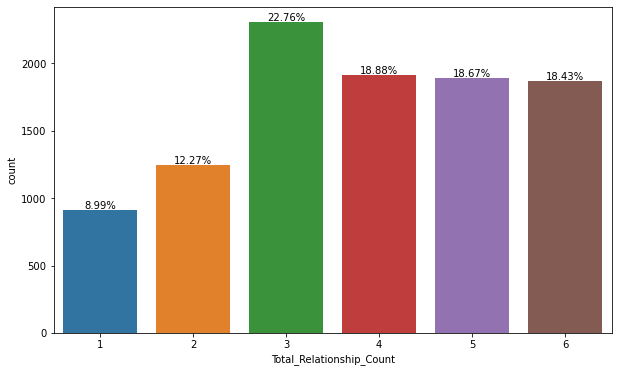

In [28]:
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = df["Total_Relationship_Count"])
bar_percentage(ax, len(df))                            # calling the function to plot the percentage on the bars

## Interpretation: Usually people have three years of relationship with the bank. Then, there is a decline of 3%. Later, there is very little variation. Approximately 20% of the people tend to leave in their first two years.

# 10. Analysis of  Months of Inactivity: Months elapsed since the last activity using credit card
LEVEL 1 Analysis of categorical data : ordinal data  (Univariate Analysis) 

In [29]:
info_of_cat('Months_Inactive_12_mon' )

Unique values in Months_Inactive_12_mon are: [1 4 2 3 6 0 5]
Mode of Months_Inactive_12_mon is 3
Number of missing values in Months_Inactive_12_mon is 0


###### Total_Relationship_Count is a ordinal datatype (Categorical) as it is having hierarchy in it.

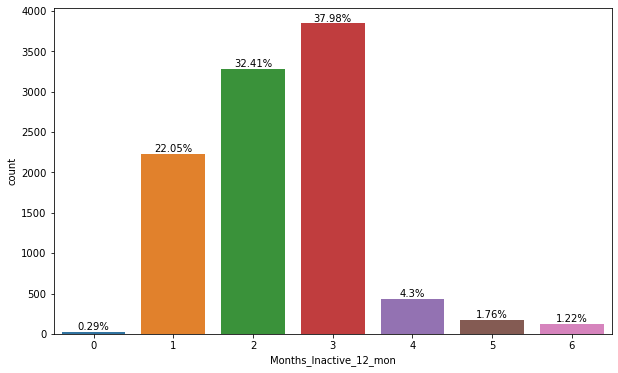

In [30]:
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = df['Months_Inactive_12_mon'])
bar_percentage(ax, len(df))                         # calling the function to plot the percentage on the bars
plt.show()

## Interpretation: Majority of the customers are inactive for 3 months.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the Dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think how the missing values could be treated. \
What kind of graph/chart can be plotted using this data? 

# User defined function for calculating mean, median, mode, standard deviation, and the count of all null values 

In [31]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

# 11. Analysis of  the Customer Age: Age of the customer
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [32]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 47.285276982324476
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 44
The standard deviation of the Customer_Age is 13.270923260536502
Number of missing values in the Customer_Age is 0


###### Customer_Age is a continuous data  (Numerical).

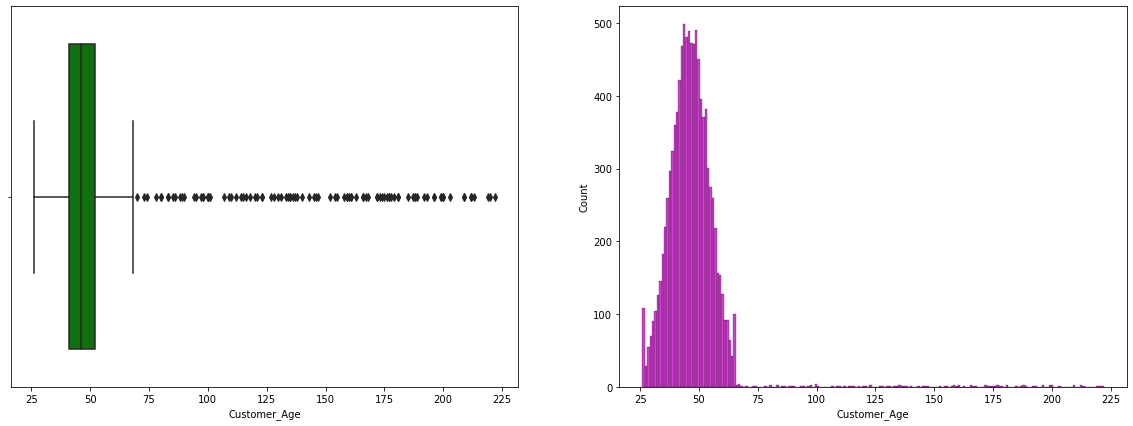

In [33]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()


In this case, the customer age follows a normal distribution. There are few customers with ages over 77. The analytics team decides to replace the ages greater than 75 with the average age of other customers. 


# Outliers Analysis and Treatment:
Customers who have ages above 75 are outliers. To treat the outliers, their age is replaced with the mean. However, this is not the only solution to treat the outliers; machine learning can help in this scenario.

In [34]:
mean = int(df.Customer_Age.mean())
# accessing the data higher than 6
x = df[df["Customer_Age"] > 75].index
for index in x:
    df.loc[index, "Customer_Age"] = mean
    

In [35]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.32931766564629
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 47
The standard deviation of the Customer_Age is 7.977505937702698
Number of missing values in the Customer_Age is 0


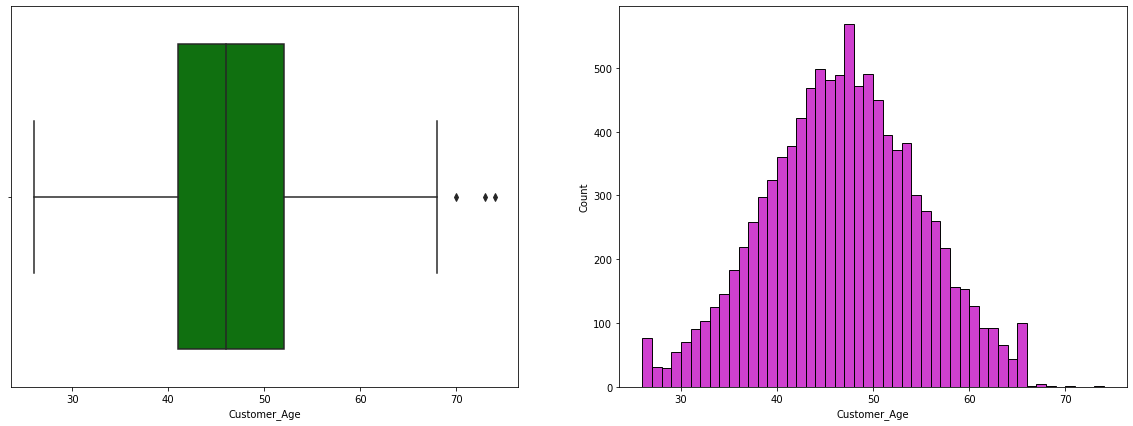

In [36]:
# Distribution of Customer_Age (Outlier Analysis)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## Interpretation: Most likely, customer age follows a normal distribution. Most of the bank customers are between 40 to 50 years of age.


# 12. Analysis of  Total_Revolving_Bal: Balance that is carried over month to month
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [37]:
info_of_numerical("Total_Revolving_Bal")

The mean of the Total_Revolving_Bal is 1162.8140614199665
The median of the Total_Revolving_Bal is 1276.0
The mode of the Total_Revolving_Bal is 0
The standard deviation of the Total_Revolving_Bal is 814.9873352357697
Number of missing values in the Total_Revolving_Bal is 0


###### Total_Revolving_Bal is a continuous datatype (Numerical).


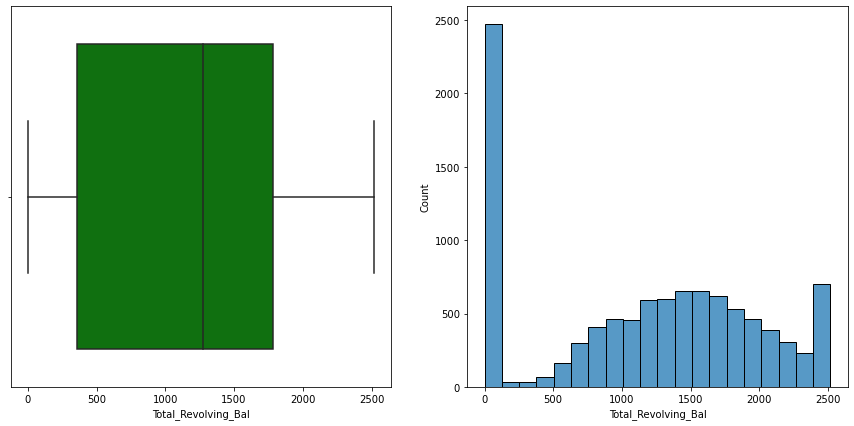

In [38]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))
sns.histplot(x = df['Total_Revolving_Bal'])                         # x axis contains the revolving balance amount in dollars.
                                                                    # y axis has the count of the customers.
sns.boxplot(x = df['Total_Revolving_Bal'], ax = ax[0], color = "g") # c : color: b is black
plt.show()

## Interpretation: There is a spike at the 0 Revolving Balance, which indicates the majority of people tend to have 0 Revolving Balance. Around 25% of the customers do not have a revolving balance. i.e. they settle the credit card bill within a month. Around 75% of customers do not pay the credit card balance on time. These are the profitable customers to the bank (they pay interest on the revolving balance).

# 13. Analysis of  Avg_Open_To_Buy: 
## Difference between the credit limit assigned to a card holder and the present balance on the account that time

Description: Monthly credit limit is $12,000. If the customer spends $5,000 in a month, then the remaining balance is $7,000 which is called "Average Open to Buy".
 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [39]:
info_of_numerical("Avg_Open_To_Buy")

The mean of the Avg_Open_To_Buy is 7469.139636614887
The median of the Avg_Open_To_Buy is 3474.0
The mode of the Avg_Open_To_Buy is 1438.3
The standard deviation of the Avg_Open_To_Buy is 9090.685323679128
Number of missing values in the Avg_Open_To_Buy is 0


###### Avg_Open_To_Buy is a continuous datatype (Numerical).


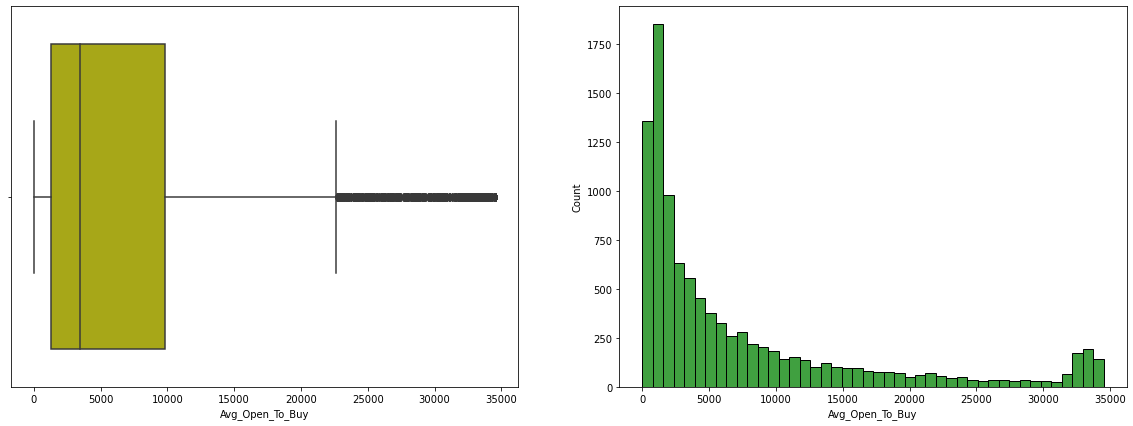

In [40]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["Avg_Open_To_Buy"], ax = ax[1], color= "g")     # xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = df['Avg_Open_To_Buy'], ax = ax[0], color = "y") # color = y:  yellow
plt.show()

# Outliers Analysis
This is right skewed data but the strength of outliers is increasing at the end of the tail, which indicates that outliers are not a human error but some people are showing behavior other than population.


# 14. Analysis of  the Total Transaction Count: Number of transactions made by the card holder
 LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [41]:
info_of_numerical("Total_Trans_Ct")

The mean of the Total_Trans_Ct is 64.85869457884863
The median of the Total_Trans_Ct is 67.0
The mode of the Total_Trans_Ct is 81
The standard deviation of the Total_Trans_Ct is 23.472570449233046
Number of missing values in the Total_Trans_Ct is 0


###### Total_Trans_Ct is a continuous datatype (Numerical).


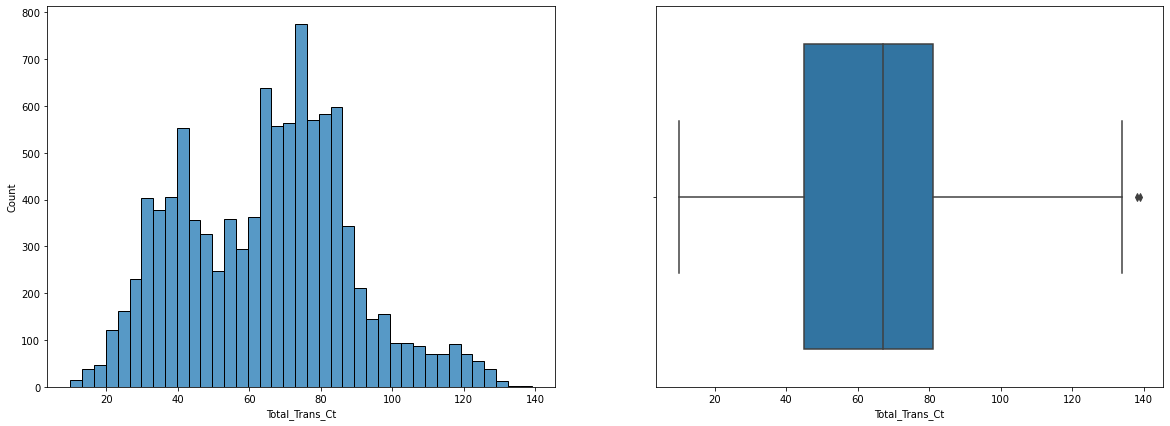

In [42]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(x = df['Total_Trans_Ct'], ax = ax[0]) #ax[0]: graph(Histogram) will be ploted at 0th position
sns.boxplot(x = df["Total_Trans_Ct"], ax = ax[1])  #ax[1]: graph(Boxplot) will be ploted at 0th position
plt.show()

## Interpretation: Majority of the customers are making more than 50 transactions.

# Q15. Analysis of  the Avg_Utilization_Ratio: It is a ratio of Total Revolving Balance to Credit Limit 
#### $$\frac{Total\;Revolving\; Balance}{Credit \;Limit}$$
## The higher the value, the greater the customers are spending.
 LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [43]:
info_of_numerical("Avg_Utilization_Ratio")

The mean of the Avg_Utilization_Ratio is 0.2748935518909845
The median of the Avg_Utilization_Ratio is 0.176
The mode of the Avg_Utilization_Ratio is 0.0
The standard deviation of the Avg_Utilization_Ratio is 0.2756914692523933
Number of missing values in the Avg_Utilization_Ratio is 0


###### Avg_Utilization_Ratio is a continuous datatype (Numerical).


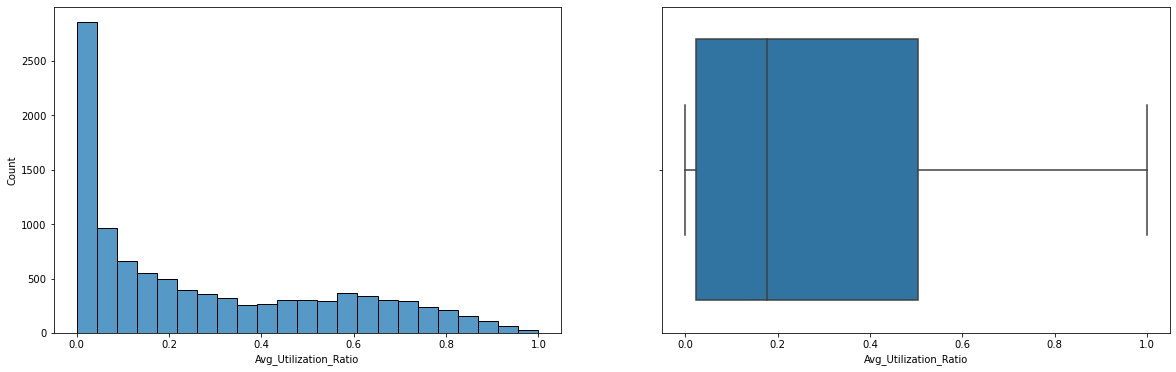

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
sns.histplot(x = df['Avg_Utilization_Ratio'], ax = ax[0])  #  ax[0]: graph(Histogram) will be ploted at 0th position
sns.boxplot(x = df['Avg_Utilization_Ratio'], ax = ax[1])   #  ax[1]: graph(Boxplot) will be ploted at 0th position
plt.show()

This is a right skewed data with no outliers.
## Interpretation: Around 75% of the customers have a low utilization (less than 0.5 utilization).

# Level 3 Further Analysis Questions

# 1. Which age group of women has a larger churn?

In [45]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


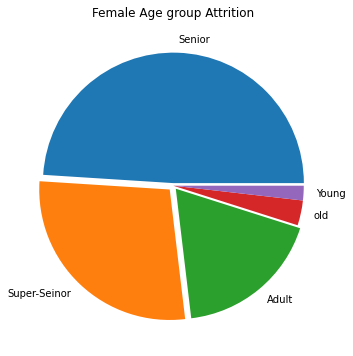

In [46]:
# Create age labels
females = df[(df["Gender"]=="F") & (df["Attrition_Flag"]=="Attrited Customer")] # accessing the data using conditional statements where & is a bitwise operator 
bins =     [0,30, 40,   50, 60, 70]                                             # Create the bins
labels =  ["Young", "Adult", "Senior", "Super-Seinor", "old"]                   # setting the labels for the bins 
data = pd.cut(females["Customer_Age"], bins = bins, labels = labels)

data = data.value_counts()                                                      # value count is counting the number of values in the column
#pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index, pctdistance = 0.5) #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Female Age group Attrition")
plt.show()

# Interpretation: Senior women have higher churn followed by Super-Senior.

# 2. Analyze the churn of women customers based on their education levels. 

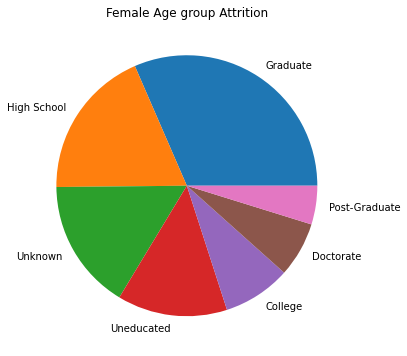

In [47]:
data = df[(df["Gender"]=="F") & (df["Attrition_Flag"]=="Attrited Customer")]

data = data["Education_Level"] 
data = data.value_counts()
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels =data.index, pctdistance = 0.5) #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Female Age group Attrition")
plt.show()

# Interpretation: Based on the education level, graduate females are churning out more compared to those who are post-graduate or doctorate. 

# 3. Do you think the average total transaction amount of women who churned out is different from those who are still with the bank?

In [48]:
with_bank = df[(df["Gender"] == "F") & (df["Attrition_Flag"] == "Existing Customer")]
left_bank = df[(df["Gender"] == "F") & (df["Attrition_Flag"] == "Attrited Customer")]
with_bank_mean = with_bank["Total_Trans_Amt"].mean()
left_bank_mean = left_bank["Total_Trans_Amt"].mean()

In [49]:
print(f"Women who are with the bank their average transaction amount is {round(with_bank_mean, 3)}")
print(f"Women who left the bank their average transaction amount is {round(left_bank_mean,3)}")

Women who are with the bank their average transaction amount is 4650.579
Women who left the bank their average transaction amount is 2792.6


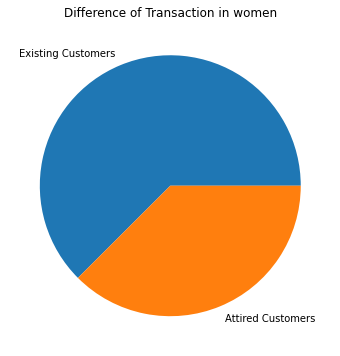

In [50]:
data = [4650, 2792]
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(data, labels = ["Existing Customers", "Attired Customers"])
plt.title("Difference of Transaction in women")
plt.show()

# Interpretation: Yes, there is a difference in the transaction amount made by the women who are with the bank compared to the women who left the bank.

# 4. Age-wise analysis of the customers whose dependent count is 2 or 3 (Existing and Churned out)

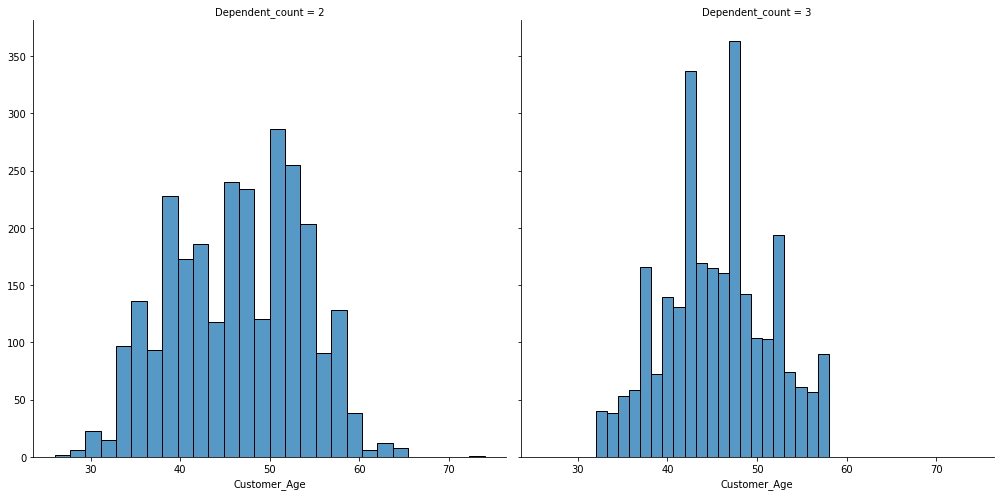

In [193]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]
g = sns.FacetGrid(data, col = "Dependent_count", height = 7)
g.map(sns.histplot, "Customer_Age")
plt.show()

###  More information is required to make a conclusion.

In [195]:
# checking for the average of the dependent count 2 and 3
dep_2_mean = data[data["Dependent_count"] == 2]["Customer_Age"].mean()
dep_3_mean = data[data["Dependent_count"] == 3]["Customer_Age"].mean()
print(dep_2_mean)
print(dep_3_mean)

46.32826972952945
45.50257542310523


# Interpretation: Most of the customers have the same age distribution based on their dependent counts.

# 5. Is there any relation between the number of dependents (2 or 3) and the education level of customers who are existing and those who churned out?

In [196]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]

c:\users\tess\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


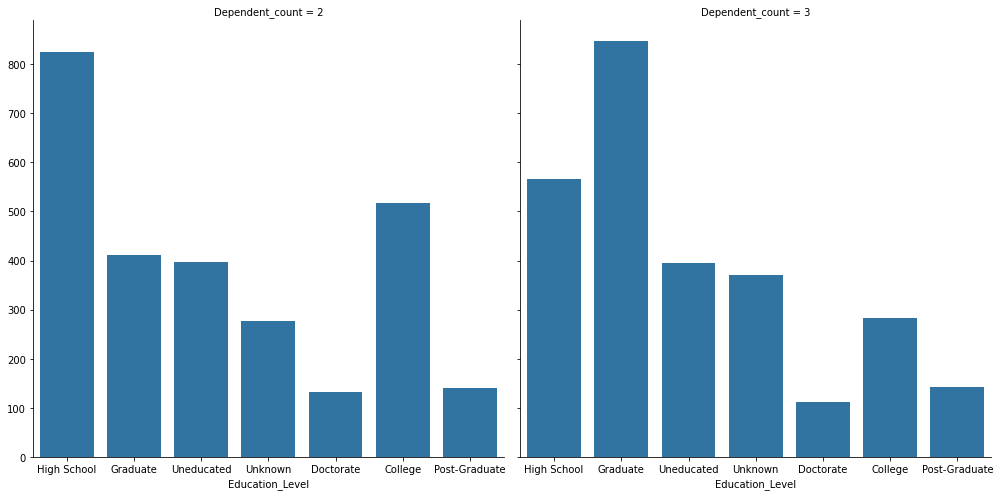

In [202]:
g = sns.FacetGrid(data, col ="Dependent_count", height = 7)
g.map(sns.countplot, "Education_Level")
plt.show()

# Interpretation: The customers who have 2 dependents are usually high school and college pass outs, but those who have 3 dependents are graduates and high school pass outs. 

# 6. Do you think the column "Average open to buy" is affected by the dependent count (2 or 3)?

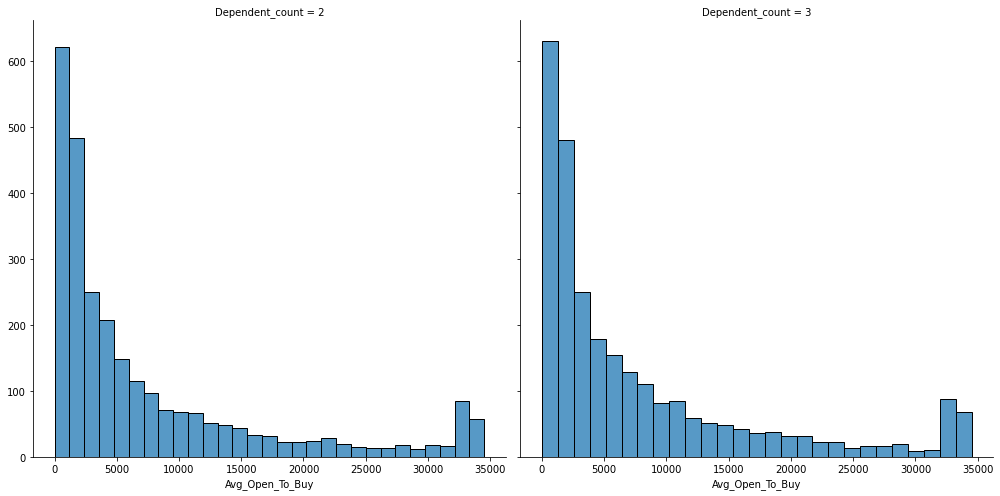

In [205]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]
g = sns.FacetGrid(data, col = "Dependent_count", height = 7)
g.map(sns.histplot, "Avg_Open_To_Buy")
plt.show()

####  More information is required to make a conclusion.

In [206]:
# checking for the average of the dependent count 2 and 3
dep_2_median = data[data["Dependent_count"] == 2]["Avg_Open_To_Buy"].median()
dep_3_median = data[data["Dependent_count"] == 3]["Avg_Open_To_Buy"].median()
print(dep_2_median)
print(dep_3_median)

3557.0
3830.5


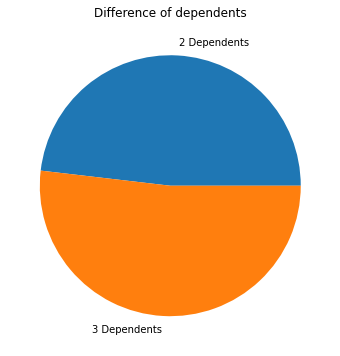

In [208]:
data = [3557, 3830]
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(data, labels = ["2 Dependents", "3 Dependents"])
plt.title("Difference of dependents")
plt.show()

# 7. Card category wise analysis of customers who are high school pass outs and churned out

# 8. Income category wise breakdown of the customers who are high school pass outs and are still with the bank

# 9. Present the details of Total Transaction Amount of existing customers who are high school pass outs. 

# 10. Analysis of the education level of the customers who are with the bank and those who left

# 11. Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing

# 12. What is the average utilization ratio of the existing customers?

# 13. Analysis of the churned out customers who hold the blue card with respect to their income categories

# 14. Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers

# 15. How is the credit limit of the blue card customers affecting the churn?

# 16. Analysis of the dependent count with respect to the customers who have churned out and the customers who are still using the services

# 17. Is there a relation between the credit limit and the attrition of the customers?

# 18. What is the average utilization ratio of the credit card for each age sub-group between 40 and 50? (We need to group the customers into 4 buckets between 40 and 50.)

# 19. How are the education level and income category affecting the customer churn?

# 20. Identify the churned out customers with high income category, high education level, and high credit limit.

# 21. Is there is a relation between the attrition and the age of customers who have a lower utilization ratio?

# 22. Analysis of marital status and utilization ratio of the customers who are leaving out the bank versus those who are still with the bank

# 23. Is there a relation between the credit limit offered to the customers (having a lower utilization ratio) compared to those who are having a higher utilization ratio?